# Name: Ashok Vaktariya

GitHub: https://github.com/ashokdhakad

Kaggle: https://www.kaggle.com/ashokvaktariya

My Portfolio Site: https://ashokvaktariya.me/


# The Sparks Foundation

# GRIP: Data Science & Business Analytics

# Exploratory Data Analysis - Retail

# Task 3

# Objective: 

**Analyse the Business and Resolve Business Problems**

# Goal:

**To arrive to a business solution to ensure the company earns maximum profits from all the branches in every state**

### Let's understand the business problem statement:
>
>The company has many branches in many states all over the US. The company deals into retailing many different items in the category of Office Supplies, Furniture and Technology catering to the needs in Consumer, Corporate and Home Office segments.
>
>  * we have to analyse the retail sale to find how each states are performing, 
>  * to find out the weak areas where it can be work out to make more profit 
>  and 
>  * if there are any business problems in any states we have to do analysis on the same to find a business solution.


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

### Importing libraries for visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Ignoring the warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [4]:
dataset=pd.read_csv('SampleSuperstore.csv')

#### finding the total rows and columns of dataset


In [5]:
dataset.shape

(9994, 13)

#### getting the overview of all the columns in the dataset

In [6]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#### Getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has and memory usage.


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#first 5 rows content of the new test dataset
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
#Just extra checking for null values
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
#Checking for duplicates values
dataset.duplicated().sum()

17

In [11]:
#Checking all duplicates in the dataset
dataset.duplicated(keep=False).sum()

34

In [12]:
#Sorting the dataset to delete the duplicates, to make duplicates come together one after another. 
#The Index value is also changed
cols = list(dataset.columns)
dataset.sort_values(by=cols,inplace=True, ignore_index=True)

In [13]:
#dropping the duplicates only keeping the last value (ordinally last row from sorted) of each duplicates
dataset.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [14]:
#rechecking everything worked well with drop_duplicated() carried out earlier on the dataset
dataset.duplicated().sum()

0

In [15]:
for col in dataset.columns:
    print(col + ':')
    print(dataset[col].value_counts())
    print()

Ship Mode:
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

Segment:
Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

Country:
United States    9977
Name: Country, dtype: int64

City:
New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Lake Elsinore        1
Conroe               1
Vacaville            1
Rochester Hills      1
Missoula             1
Name: City, Length: 531, dtype: int64

State:
California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                1

# Plotting the States based on Total profit earnings


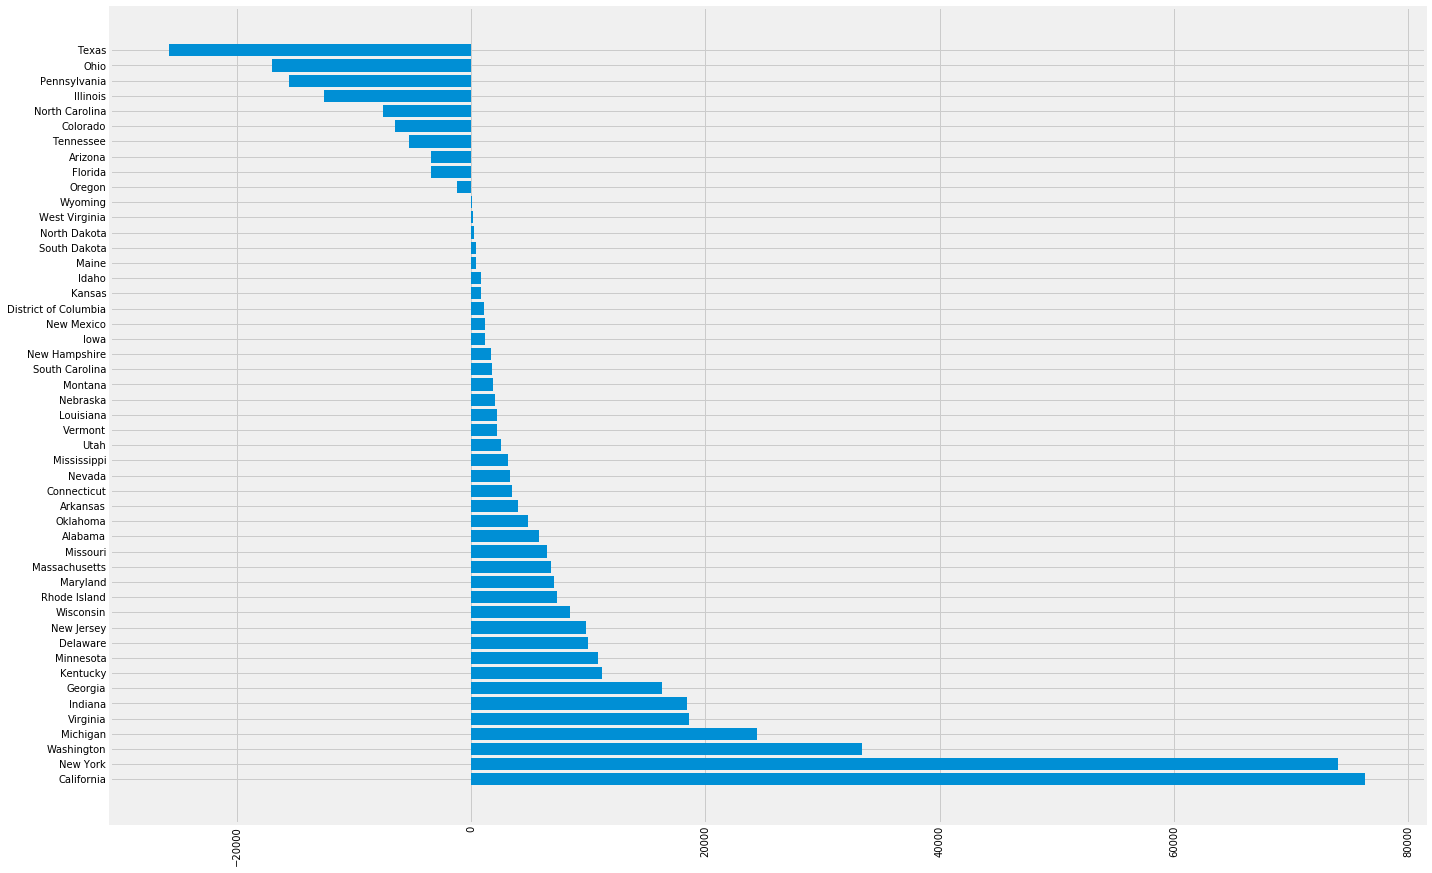

In [16]:
#getting a list of unique state
_list = dataset['State'].value_counts().index.tolist()
state_profit = {}
for s in _list:
    dataframe= dataset.loc[dataset['State']==s]
    totalprofit=0
    state = s
    for i in range(len(dataframe)):
        totalprofit = totalprofit + dataframe['Profit'].iloc[i]
    state_profit[state]=totalprofit
    
state_data = pd.DataFrame(list(state_profit.items()),columns = ['State','Totalprofit'])
state_data.sort_values(by='Totalprofit', inplace=True, ignore_index=True, ascending = False)
plt.figure(figsize=(21,15))
plt.barh(state_data['State'], state_data['Totalprofit'])
plt.xticks(rotation=90)
plt.show()
        

In [17]:
state_data

,State,Totalprofit
0,California,76330.7891
1,New York,74015.4622
2,Washington,33368.2375
3,Michigan,24428.0903
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


### In above horizontal bar plot and dataset we find that California and New York are the states earning very good profits then there is a gradual fall in the profit earnings from Washington onwards to Wyoming, where the profit earnings of West Virginia and Wyoming are almost negligible only.

### And states from Oregon to Texas are running into losses with Texas facing maximum loss.


# Plotting Segment based on Total Profit earnings per State

In [18]:
state_seg= {}
for s in _list:
    df = dataset.loc[dataset['State'] == s]
    state = s
    consumer = 0
    corporate = 0
    homeoffice = 0

    for i in range(len(df)):
        seg = df['Segment'].iloc[i]
        if seg == 'Consumer':
            consumer += df['Profit'].iloc[i]
        elif seg == 'Corporate':
            corporate += df['Profit'].iloc[i]
        else:
            homeoffice += df['Profit'].iloc[i]
    state_seg[state] = {'Consumer' : consumer, 'Corporate' : corporate, 'HomeOffice' : homeoffice }


statesegment_data = pd.DataFrame.from_dict(state_seg)
statesegment_data.loc['totalprofit'] = statesegment_data.sum(axis=0)
statesegment_data.sort_values(by=['totalprofit'], axis = 1, inplace=True,  ascending = False)

In [19]:
statesegment_data

,California,New York,Washington,Michigan,Virginia,Indiana,Georgia,Kentucky,Minnesota,Delaware,...,Oregon,Florida,Arizona,Tennessee,Colorado,North Carolina,Illinois,Pennsylvania,Ohio,Texas
Consumer,38346.4884,39617.4319,19811.0844,12915.4259,9526.8628,4026.2123,8035.2254,6663.8398,7503.1089,6894.9006,...,-842.3643,-137.2829,-1423.0527,-3590.8478,-1614.5502,-2688.7785,-5470.8934,-7291.4676,-11274.8334,-20612.5605
Corporate,24364.6689,16524.5481,9274.1385,5816.5265,7308.4774,12293.7208,5561.7122,2106.4954,1116.0349,2193.3383,...,180.7439,-1417.7920,-788.9158,-640.0382,-566.0659,-3811.6972,-4486.6447,-5197.4417,-4947.4152,-4053.7546
HomeOffice,13619.6318,17873.4822,4283.0146,5696.1379,1762.6102,2063.0032,2653.1057,2429.3614,2204.0436,889.1359,...,-532.4789,-1844.2268,-1215.9561,-1110.8076,-4347.2418,-990.4365,-2644.1119,-3076.4942,-737.0692,-1084.6682
totalprofit,76330.7891,74015.4622,33368.2375,24428.0903,18597.9504,18382.9363,16250.0433,11199.6966,10823.1874,9977.3748,...,-1194.0993,-3399.3017,-3427.9246,-5341.6936,-6527.8579,-7490.9122,-12601.6500,-15565.4035,-16959.3178,-25750.9833


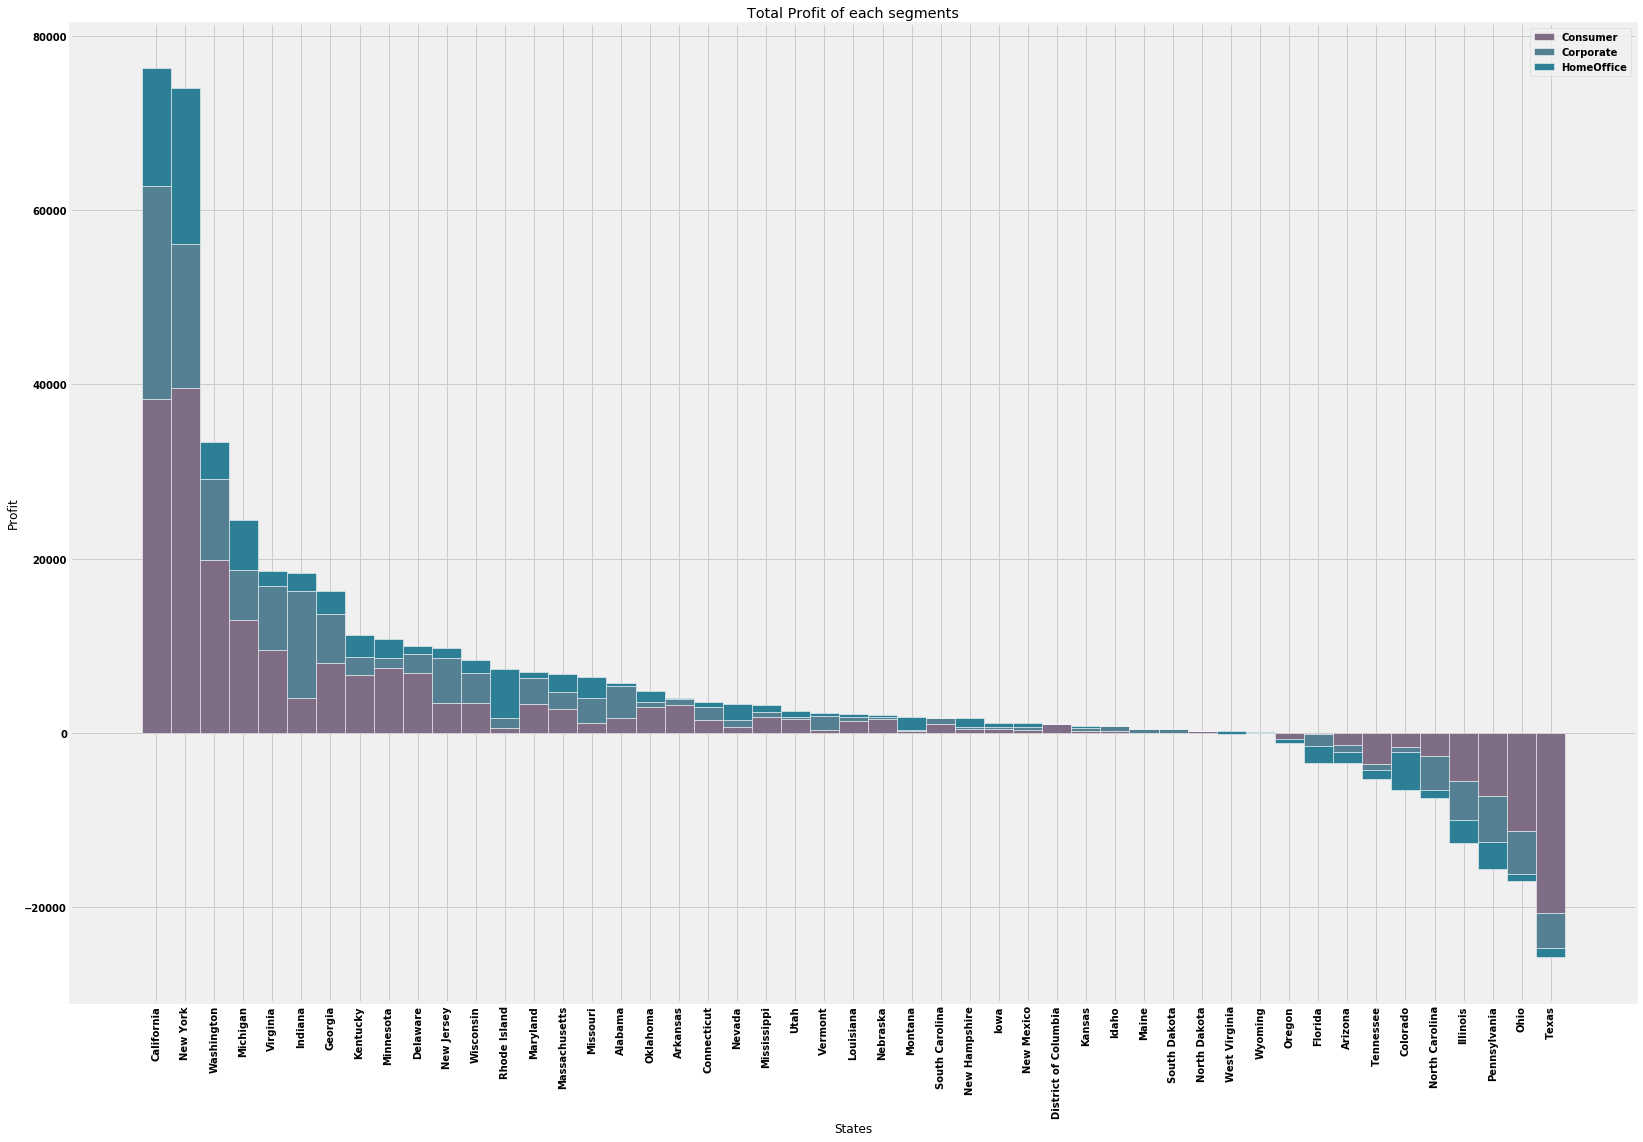

In [20]:
from matplotlib import rc
rc('font', weight='bold')

# Values of each group
bars1 = list(statesegment_data.loc['Consumer'])
bars2 = list(statesegment_data.loc['Corporate'])
bars3 = list(statesegment_data.loc['HomeOffice'])
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = np.arange(len(statesegment_data.columns))
 
# Names of group and bar width
names = statesegment_data.columns
barWidth = 1
plt.figure(figsize=(25,18))

plt.bar(r, bars1, color='#7f6d85', edgecolor='white', width=barWidth)

plt.bar(r, bars2, bottom=bars1, color='#557f92', edgecolor='white', width=barWidth)

plt.bar(r, bars3, bottom=bars, color='#2d7f95', edgecolor='white', width=barWidth)
 

plt.xticks(r, names, fontweight='bold')
plt.xlabel('States')
plt.xticks(rotation=90) 
plt.ylabel('Profit')
plt.legend(['Consumer', 'Corporate', 'HomeOffice'], loc ="upper right") 
plt.title('Total Profit of each segments')

plt.show()


### In above stacked bar plot and dataset we conclude that states like California and New York are performing well, means there is a lots of potential business growth in these states. So we need to tap deeper into the market and understand the needs of prospective customers to make more profits than the existing profits.

### Whereas states from Washington onwards to Wyoming needs to revise their marketing strategies by creating more brand awareness. Understanding the requirements of market and each prospective customers and selling the items as per their requirements, which can even mean adding more items for selling to the existing list of items available in these departments. Also there is an urgent need of creating an awareness by making market and each of the prospective customers understand the importance and create a need of the already existing items available on the list with revise marketing strategy.  

### But what is more concerning is the fact why states from Oregon to Texas are running into losses with Texas facing maximum loss. We need to analysis the business problem here in these states and try to resolve it.

# Analyzing why states from Oregon to Texas are running into losses with Texas facing maximum loss and find a business solution to resolve this business problems in these states.

#### so to understand and find a business solution the best thing will be analyzing these states data with California and New York states, which are performing well.


In [21]:
compare_df = dataset[(dataset['State'] == 'California') | (dataset['State'] == 'New York') | (dataset['State'] == 'Oregon') | 
                         (dataset['State'] == 'Florida') | (dataset['State'] == 'Arizona') | (dataset['State'] == 'Tennessee') |
                         (dataset['State'] == 'Colorado') | (dataset['State'] == 'North Carolina') | (dataset['State'] == 'Illinois')
                         | (dataset['State'] == 'Pennsylvania')| (dataset['State'] == 'Ohio')| (dataset['State'] == 'Texas')]

In [22]:
compare_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,First Class,Consumer,United States,Abilene,Texas,79605,Central,Office Supplies,Appliances,1.392,2,0.8,-3.7584
1,First Class,Consumer,United States,Akron,Ohio,44312,East,Office Supplies,Storage,221.024,2,0.2,-55.2560
2,First Class,Consumer,United States,Allen,Texas,75002,Central,Office Supplies,Binders,8.784,4,0.8,-13.6152
3,First Class,Consumer,United States,Allen,Texas,75002,Central,Technology,Accessories,21.480,3,0.2,-0.2685
8,First Class,Consumer,United States,Arlington,Texas,76017,Central,Office Supplies,Art,8.928,2,0.2,0.5580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,Standard Class,Home Office,United States,West Palm Beach,Florida,33407,South,Office Supplies,Art,13.120,5,0.2,2.1320
9973,Standard Class,Home Office,United States,Wilson,North Carolina,27893,South,Office Supplies,Binders,7.380,5,0.7,-5.4120
9974,Standard Class,Home Office,United States,Woodstock,Illinois,60098,Central,Office Supplies,Art,2.912,2,0.2,0.9100
9975,Standard Class,Home Office,United States,Yonkers,New York,10701,East,Technology,Machines,52.440,4,0.0,24.1224


In [23]:
compare_df['State'].value_counts()

California        1996
New York          1127
Texas              983
Pennsylvania       586
Illinois           491
Ohio               468
Florida            383
North Carolina     249
Arizona            224
Tennessee          183
Colorado           182
Oregon             123
Name: State, dtype: int64

In [24]:
compare_df['sale_totalamount'] = round((compare_df['Sales'] * compare_df['Quantity']),2)
compare_df['amt_afterdiscount'] = round((compare_df['sale_totalamount'] - ((compare_df['sale_totalamount'] * compare_df['Discount'])/100)), 2)

In [25]:
compare_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,sale_totalamount,amt_afterdiscount
0,First Class,Consumer,United States,Abilene,Texas,79605,Central,Office Supplies,Appliances,1.392,2,0.8,-3.7584,2.78,2.76
1,First Class,Consumer,United States,Akron,Ohio,44312,East,Office Supplies,Storage,221.024,2,0.2,-55.2560,442.05,441.17
2,First Class,Consumer,United States,Allen,Texas,75002,Central,Office Supplies,Binders,8.784,4,0.8,-13.6152,35.14,34.86
3,First Class,Consumer,United States,Allen,Texas,75002,Central,Technology,Accessories,21.480,3,0.2,-0.2685,64.44,64.31
8,First Class,Consumer,United States,Arlington,Texas,76017,Central,Office Supplies,Art,8.928,2,0.2,0.5580,17.86,17.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,Standard Class,Home Office,United States,West Palm Beach,Florida,33407,South,Office Supplies,Art,13.120,5,0.2,2.1320,65.60,65.47
9973,Standard Class,Home Office,United States,Wilson,North Carolina,27893,South,Office Supplies,Binders,7.380,5,0.7,-5.4120,36.90,36.64
9974,Standard Class,Home Office,United States,Woodstock,Illinois,60098,Central,Office Supplies,Art,2.912,2,0.2,0.9100,5.82,5.81
9975,Standard Class,Home Office,United States,Yonkers,New York,10701,East,Technology,Machines,52.440,4,0.0,24.1224,209.76,209.76


In [26]:
comparelist=compare_df['State'].value_counts().index.tolist()
comparelist

['California',
 'New York',
 'Texas',
 'Pennsylvania',
 'Illinois',
 'Ohio',
 'Florida',
 'North Carolina',
 'Arizona',
 'Tennessee',
 'Colorado',
 'Oregon']

In [30]:
shipmode=compare_df['Ship Mode'].value_counts().index.to_list()
shipmode

['Standard Class', 'Second Class', 'First Class', 'Same Day']

In [32]:
diff_discounts = compare_df['Discount'].value_counts().index.to_list()
diff_discounts

[0.2, 0.0, 0.7, 0.8, 0.4, 0.3, 0.6, 0.1, 0.5, 0.15, 0.32, 0.45]

# Plotting the Performance Check of Total Sales Amount and Profit-Loss of states to compare between California and New York with Texas,Ohio,Pennsylvania,Illinois,Florida,North Carolina,Arizona,Tennessee,Colorada and Oregon.


In [35]:
state_sale= {}
for s in comparelist:
    df = compare_df.loc[compare_df['State'] == s]
    state = s
    sale_totalamount = 0
    amt_afterdiscount = 0
    profit = 0
    for i in range(len(df)):
        sale_totalamount += df['sale_totalamount'].iloc[i]
        amt_afterdiscount += df['amt_afterdiscount'].iloc[i]
        profit += round(df['Profit'].iloc[i], 2)
    state_sale[state] = {'sale_totalamount' : round(sale_totalamount,2), 'amt_afterdiscount' : round(amt_afterdiscount, 2), 'Profit' : round(profit, 2) }


stateperformanceorloophole_data = pd.DataFrame.from_dict(state_sale)
stateperformanceorloophole_data.sort_values(by=['sale_totalamount'], axis = 1, inplace=True,  ascending = False)

In [36]:
stateperformanceorloophole_data

,California,New York,Texas,Pennsylvania,Florida,Illinois,Ohio,North Carolina,Arizona,Tennessee,Colorado,Oregon
sale_totalamount,2300805.13,1560877.16,833898.19,602080.48,472091.43,365073.55,361971.21,282777.68,170003.43,158655.03,145591.16,78988.32
amt_afterdiscount,2298027.50,1559668.09,831284.21,600074.00,470565.51,363950.21,360657.08,281846.13,169506.15,158103.46,145140.12,78792.96
Profit,76330.63,74015.38,-25750.94,-15565.50,-3399.26,-12601.70,-16959.32,-7490.84,-3427.89,-5341.67,-6527.88,-1194.10


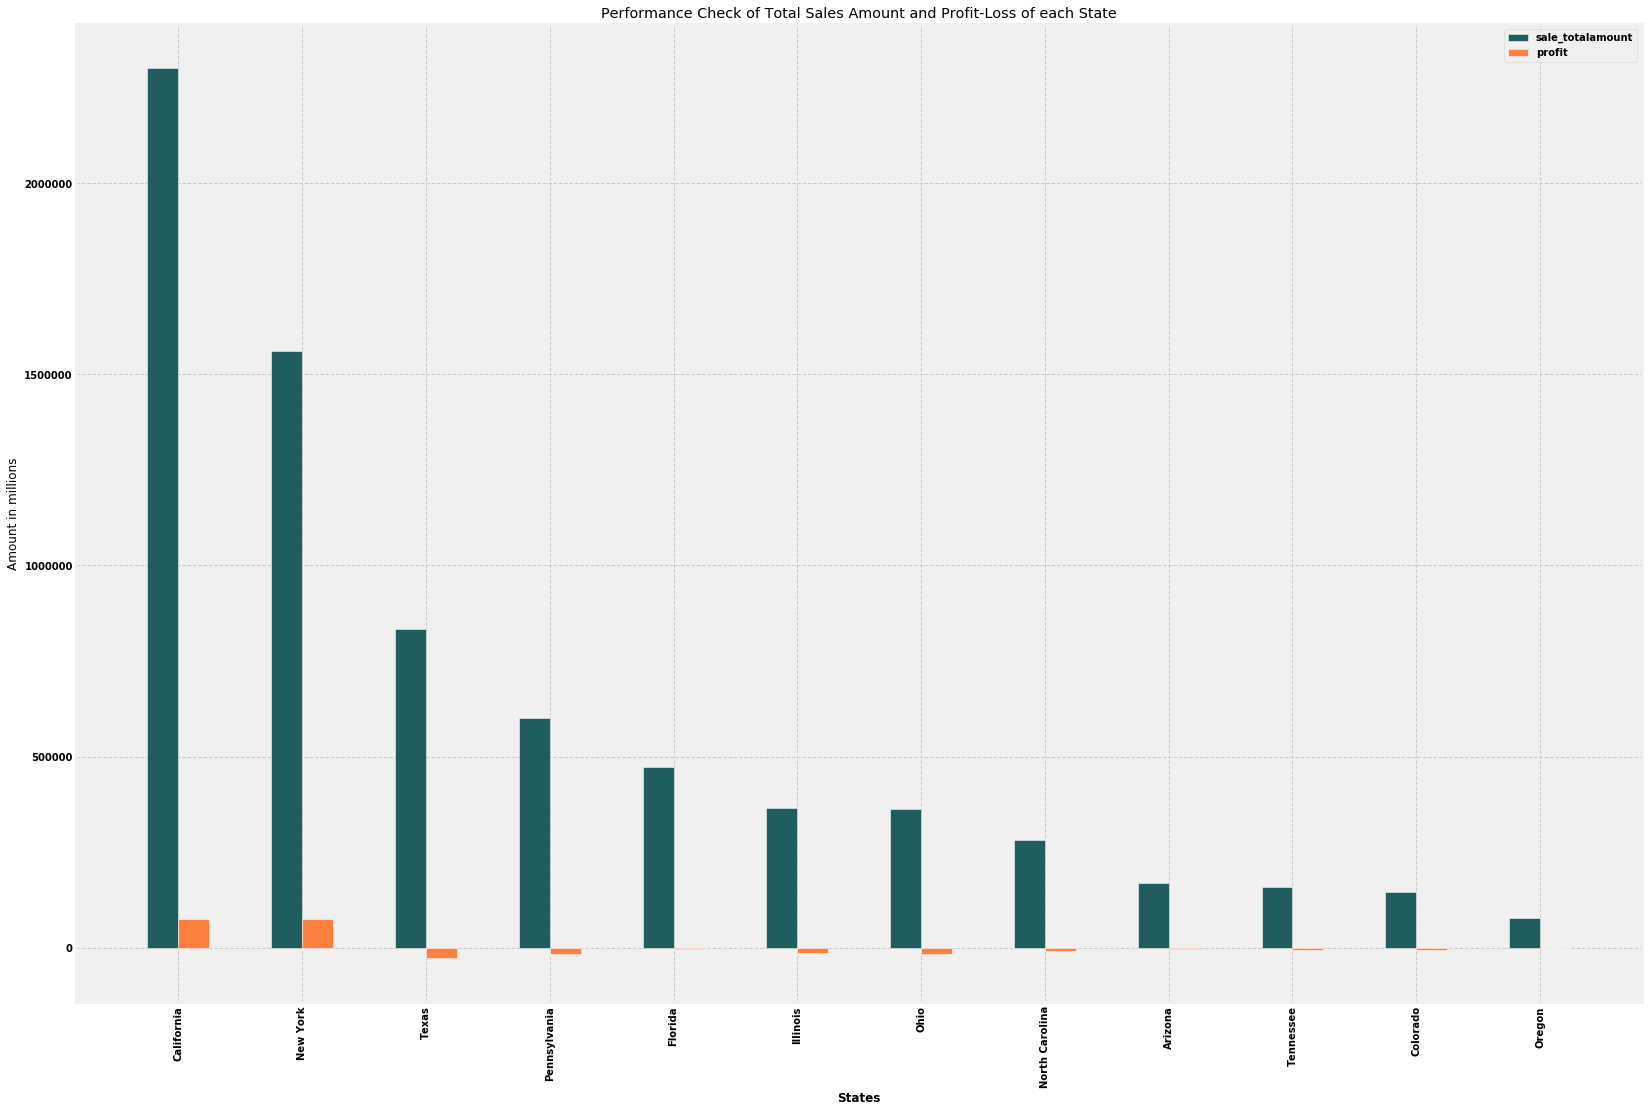

In [37]:
# set width of bar
barWidth = 0.25
plt.figure(figsize=(25,18)) 
bars1 = list(stateperformanceorloophole_data.loc['sale_totalamount'])
bars2 = list(stateperformanceorloophole_data.loc['Profit'])
statenames = stateperformanceorloophole_data.columns.tolist()

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#1f5d5f', width=barWidth, edgecolor='white')
plt.bar(r2, bars2, color='#ff7f3f', width=barWidth, edgecolor='white')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + (barWidth/2) for r in range(len(bars1))],  statenames, fontweight='bold')
plt.xlabel('States')
plt.xticks(rotation=90) 
plt.ylabel('Amount in millions')
plt.legend(['sale_totalamount', 'profit'], loc = 'best') 
plt.title('Performance Check of Total Sales Amount and Profit-Loss of each State')
plt.grid(True, linewidth= 1, linestyle="--")

plt.show()

### As mentioned earlier to increase the sale and so the profit, the states showing loss needs to follow the point we discussed earlier about creating brand awareness, revising marketing strategies, understanding the needs and demand, making prospects realise the need of the products that are already available on shelf for sale and etc. 

### But right now our main concern is to analyze to understand that though in the states - Texas, Ohio, Pennsylvania, Illinois, Florida, North Carolina, Arizona, Tennessee, Colorado and Oregon - the sales are happening irrespective of being it less but then why there are no profit and fact is they are going in loss.

### As mentioned earlier to increase the sale and so the profit, the states showing loss needs to follow the point we discussed earlier about creating brand awareness, revising marketing strategies, understanding the needs and demand, making prospects realise the need of the products that are already available on shelf for sale and etc. 

### But right now our main concern is to analyze to understand that though in the states - Texas, Ohio, Pennsylvania, Illinois, Florida, North Carolina, Arizona, Tennessee, Colorado and Oregon - the sales are happening irrespective of being it less but then why there are no profit and fact is they are going in loss.

In [39]:
state_dis= {}
for s in comparelist:
    df = compare_df.loc[compare_df['State'] == s]
    state = s
    dis_20 = 0
    no_dis = 0
    dis_70 = 0
    dis_80 = 0
    dis_10 = 0
    dis_60 = 0
    dis_30 = 0
    dis_15 = 0
    dis_50 = 0
    dis_40 = 0
    dis_45 = 0
  
    for i in range(len(df)):
        if df['Discount'].iloc[i] == 0.2:
            dis_20 += 1
        elif df['Discount'].iloc[i] == 0.7:
            dis_70 += 1
        elif df['Discount'].iloc[i] == 0.8:
            dis_80 += 1
        elif df['Discount'].iloc[i] == 0.1:
            dis_10 += 1
        elif df['Discount'].iloc[i] == 0.6:
            dis_60 += 1
        elif df['Discount'].iloc[i] == 0.3:
            dis_30 += 1
        elif df['Discount'].iloc[i] == 0.15:
            dis_15 += 1
        elif df['Discount'].iloc[i] == 0.5:
            dis_50 += 1
        elif df['Discount'].iloc[i] == 0.4:
            dis_40 += 1
        elif df['Discount'].iloc[i] == 0.45:
            dis_45 += 1
        else:
            no_dis += 1
    state_dis[state] = {'20%' : dis_20, '70%' : dis_70, '80%' : dis_80, '10%' : dis_10, '60%' : dis_60, '30%' : dis_30, '15%' : dis_15,
                      '50%' : dis_50, '40%' : dis_40, '45%' : dis_45, '0%': no_dis  }


statediscount_data = pd.DataFrame.from_dict(state_dis)
statediscount_data.sort_index(axis = 0, inplace=True,  ascending = True)

In [40]:
statediscount_data

,California,New York,Texas,Pennsylvania,Illinois,Ohio,Florida,North Carolina,Arizona,Tennessee,Colorado,Oregon
0%,1255,805,27,0,0,0,0,0,0,0,0,0
10%,0,76,0,0,0,0,0,0,0,0,0,0
15%,52,0,0,0,0,0,0,0,0,0,0,0
20%,689,218,568,353,264,290,299,201,174,144,138,99
30%,0,0,94,36,53,22,0,0,0,0,0,0
40%,0,28,13,82,0,67,0,8,0,8,0,0
45%,0,0,0,0,0,0,11,0,0,0,0,0
50%,0,0,0,10,18,8,6,4,9,2,4,5
60%,0,0,81,0,57,0,0,0,0,0,0,0
70%,0,0,0,105,0,81,67,36,41,29,40,19


In [41]:
colname = statediscount_data.columns.tolist()
colname

['California',
 'New York',
 'Texas',
 'Pennsylvania',
 'Illinois',
 'Ohio',
 'Florida',
 'North Carolina',
 'Arizona',
 'Tennessee',
 'Colorado',
 'Oregon']

Text(0.5, 108.49999999999989, 'Discounts')

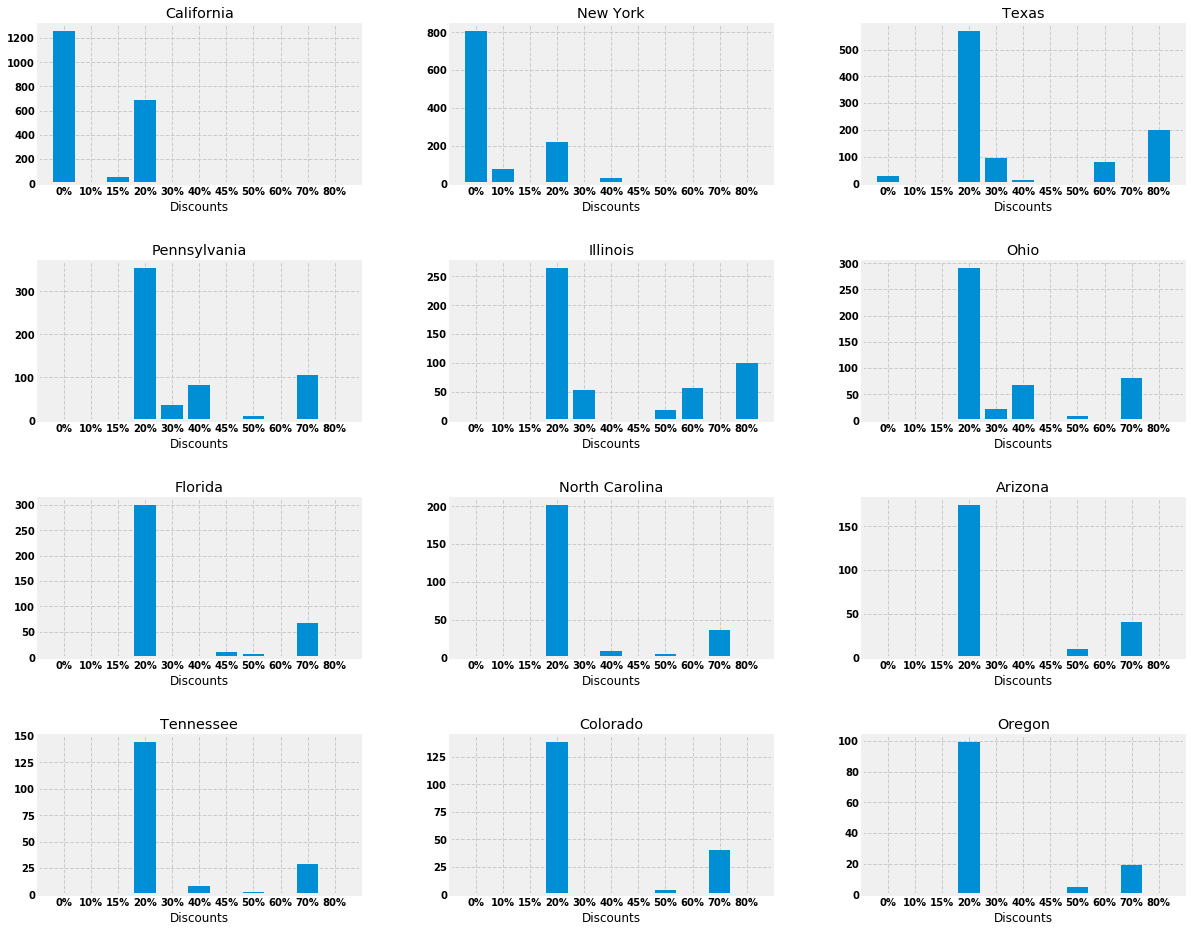

In [42]:
fig, axes = plt.subplots(4, 3, figsize=(18,14))
fig.tight_layout(pad=6.0)
axes[0,0].bar(statediscount_data.index.tolist(), statediscount_data[colname[0]].tolist())
axes[0,0].grid(True, linewidth= 1, linestyle="--")
axes[0,0].set_title(colname[0])
axes[0,0].set_xlabel('Discounts')

axes[0,1].bar(statediscount_data.index.tolist(), statediscount_data[colname[1]].tolist())
axes[0,1].grid(True, linewidth= 1, linestyle="--")
axes[0,1].set_title(colname[1])
axes[0,1].set_xlabel('Discounts')

axes[0,2].bar(statediscount_data.index.tolist(), statediscount_data[colname[2]].tolist())
axes[0,2].grid(True, linewidth= 1, linestyle="--")
axes[0,2].set_title(colname[2])
axes[0,2].set_xlabel('Discounts')

axes[1,0].bar(statediscount_data.index.tolist(), statediscount_data[colname[3]].tolist())
axes[1,0].grid(True, linewidth= 1, linestyle="--")
axes[1,0].set_title(colname[3])
axes[1,0].set_xlabel('Discounts')

axes[1,1].bar(statediscount_data.index.tolist(), statediscount_data[colname[4]].tolist())
axes[1,1].grid(True, linewidth= 1, linestyle="--")
axes[1,1].set_title(colname[4])
axes[1,1].set_xlabel('Discounts')

axes[1,2].bar(statediscount_data.index.tolist(), statediscount_data[colname[5]].tolist())
axes[1,2].grid(True, linewidth= 1, linestyle="--")
axes[1,2].set_title(colname[5])
axes[1,2].set_xlabel('Discounts')

axes[2,0].bar(statediscount_data.index.tolist(), statediscount_data[colname[6]].tolist())
axes[2,0].grid(True, linewidth= 1, linestyle="--")
axes[2,0].set_title(colname[6])
axes[2,0].set_xlabel('Discounts')

axes[2,1].bar(statediscount_data.index.tolist(), statediscount_data[colname[7]].tolist())
axes[2,1].grid(True, linewidth= 1, linestyle="--")
axes[2,1].set_title(colname[7])
axes[2,1].set_xlabel('Discounts')

axes[2,2].bar(statediscount_data.index.tolist(), statediscount_data[colname[8]].tolist())
axes[2,2].grid(True, linewidth= 1, linestyle="--")
axes[2,2].set_title(colname[8])
axes[2,2].set_xlabel('Discounts')

axes[3,0].bar(statediscount_data.index.tolist(), statediscount_data[colname[9]].tolist())
axes[3,0].grid(True, linewidth= 1, linestyle="--")
axes[3,0].set_title(colname[9])
axes[3,0].set_xlabel('Discounts')

axes[3,1].bar(statediscount_data.index.tolist(), statediscount_data[colname[10]].tolist())
axes[3,1].grid(True, linewidth= 1, linestyle="--")
axes[3,1].set_title(colname[10])
axes[3,1].set_xlabel('Discounts')

axes[3,2].bar(statediscount_data.index.tolist(), statediscount_data[colname[11]].tolist())
axes[3,2].grid(True, linewidth= 1, linestyle="--")
axes[3,2].set_title(colname[11])
axes[3,2].set_xlabel('Discounts')



In [46]:
statedis_salesamount= {}
for s in comparelist:
    df = compare_df.loc[compare_df['State'] == s]
    state = s
    dis20_salesamt = 0
    nodis_salesamt = 0
    dis70_salesamt = 0
    dis80_salesamt = 0
    dis10_salesamt = 0
    dis60_salesamt = 0
    dis30_salesamt = 0
    dis15_salesamt = 0
    dis50_salesamt = 0
    dis40_salesamt = 0
    dis45_salesamt = 0

    for i in range(len(df)):
        if df['Discount'].iloc[i] == 0.2:
            dis20_salesamt += df['sale_totalamount'].iloc[i]
        elif df['Discount'].iloc[i] == 0.7:
            dis70_salesamt += df['sale_totalamount'].iloc[i]
        elif df['Discount'].iloc[i] == 0.8:
            dis80_salesamt += df['sale_totalamount'].iloc[i]
        elif df['Discount'].iloc[i] == 0.1:
            dis10_salesamt += df['sale_totalamount'].iloc[i]
        elif df['Discount'].iloc[i] == 0.6:
            dis60_salesamt += df['sale_totalamount'].iloc[i]
        elif df['Discount'].iloc[i] == 0.3:
            dis30_salesamt += df['sale_totalamount'].iloc[i]
        elif df['Discount'].iloc[i] == 0.15:
            dis15_salesamt += df['sale_totalamount'].iloc[i]
        elif df['Discount'].iloc[i] == 0.5:
            dis50_salesamt += df['sale_totalamount'].iloc[i]
        elif df['Discount'].iloc[i] == 0.4:
            dis40_salesamt += df['sale_totalamount'].iloc[i]
        elif df['Discount'].iloc[i] == 0.45:
            dis45_salesamt += df['sale_totalamount'].iloc[i]
        else:
            nodis_salesamt += df['sale_totalamount'].iloc[i]

    statedis_salesamount[state] = {'20%' : dis20_salesamt, '70%' : dis70_salesamt, '80%' : dis80_salesamt, '10%' : dis10_salesamt, 
                                 '60%' : dis60_salesamt, '30%' : dis30_salesamt, '15%' : dis15_salesamt,
                                 '50%' : dis50_salesamt, '40%' : dis40_salesamt, '45%' : dis45_salesamt, '0%': nodis_salesamt  }


statedis_salesamount = pd.DataFrame.from_dict(statedis_salesamount)
statedis_salesamount.sort_index(axis = 0, inplace=True,  ascending = True)

In [48]:
statedis_salesamount

,California,New York,Texas,Pennsylvania,Illinois,Ohio,Florida,North Carolina,Arizona,Tennessee,Colorado,Oregon
0%,875356.69,872758.57,74582.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10%,0.00,288451.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,146627.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
20%,1278821.32,339027.59,377932.73,221010.50,201917.69,126192.10,286891.73,138802.48,130263.52,88411.23,111159.44,69182.28
30%,0.00,0.00,190810.33,106204.42,94391.12,52118.84,0.00,0.00,0.00,0.00,0.00,0.00
40%,0.00,60639.84,110217.66,205357.26,0.00,120135.64,0.00,88747.59,0.00,38084.48,0.00,0.00
45%,0.00,0.00,0.00,0.00,0.00,0.00,24808.78,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,31102.46,29449.53,9836.67,141111.92,43866.26,20695.25,1389.48,6191.46,5851.44
60%,0.00,0.00,18369.11,0.00,12706.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
70%,0.00,0.00,0.00,38405.84,0.00,53687.96,19279.00,11361.35,19044.66,30769.84,28240.26,3954.60


Text(0.5, 108.49999999999989, 'Discounts_SalesAmount')

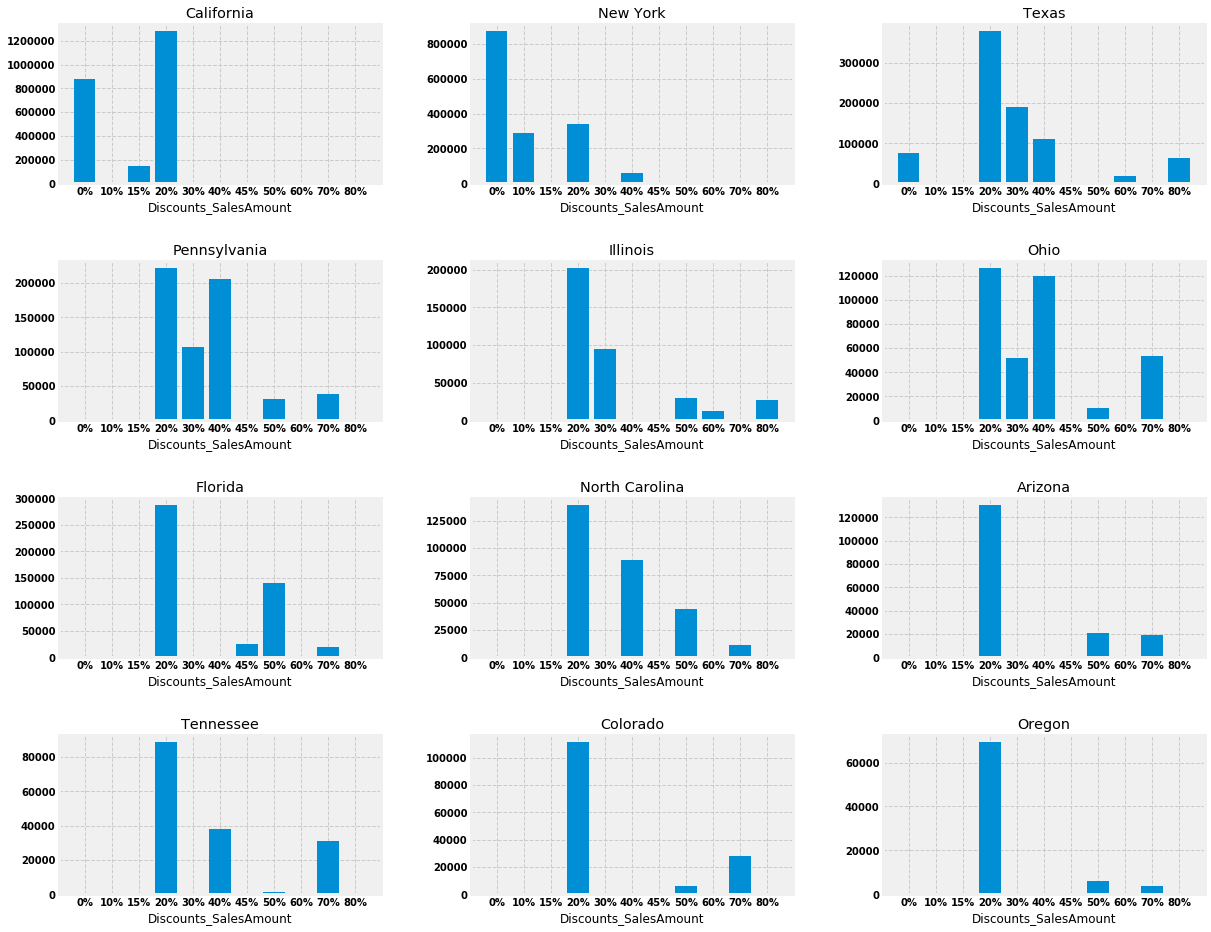

In [49]:
fig, axes = plt.subplots(4, 3, figsize=(18,14))
fig.tight_layout(pad=6.0)
axes[0,0].bar(statedis_salesamount.index.tolist(), statedis_salesamount[colname[0]].tolist())
axes[0,0].grid(True, linewidth= 1, linestyle="--")
axes[0,0].set_title(colname[0])
axes[0,0].set_xlabel('Discounts_SalesAmount')

axes[0,1].bar(statedis_salesamount.index.tolist(), statedis_salesamount[colname[1]].tolist())
axes[0,1].grid(True, linewidth= 1, linestyle="--")
axes[0,1].set_title(colname[1])
axes[0,1].set_xlabel('Discounts_SalesAmount')

axes[0,2].bar(statedis_salesamount.index.tolist(), statedis_salesamount[colname[2]].tolist())
axes[0,2].grid(True, linewidth= 1, linestyle="--")
axes[0,2].set_title(colname[2])
axes[0,2].set_xlabel('Discounts_SalesAmount')

axes[1,0].bar(statedis_salesamount.index.tolist(), statedis_salesamount[colname[3]].tolist())
axes[1,0].grid(True, linewidth= 1, linestyle="--")
axes[1,0].set_title(colname[3])
axes[1,0].set_xlabel('Discounts_SalesAmount')

axes[1,1].bar(statedis_salesamount.index.tolist(), statedis_salesamount[colname[4]].tolist())
axes[1,1].grid(True, linewidth= 1, linestyle="--")
axes[1,1].set_title(colname[4])
axes[1,1].set_xlabel('Discounts_SalesAmount')

axes[1,2].bar(statedis_salesamount.index.tolist(), statedis_salesamount[colname[5]].tolist())
axes[1,2].grid(True, linewidth= 1, linestyle="--")
axes[1,2].set_title(colname[5])
axes[1,2].set_xlabel('Discounts_SalesAmount')

axes[2,0].bar(statedis_salesamount.index.tolist(), statedis_salesamount[colname[6]].tolist())
axes[2,0].grid(True, linewidth= 1, linestyle="--")
axes[2,0].set_title(colname[6])
axes[2,0].set_xlabel('Discounts_SalesAmount')

axes[2,1].bar(statedis_salesamount.index.tolist(), statedis_salesamount[colname[7]].tolist())
axes[2,1].grid(True, linewidth= 1, linestyle="--")
axes[2,1].set_title(colname[7])
axes[2,1].set_xlabel('Discounts_SalesAmount')

axes[2,2].bar(statedis_salesamount.index.tolist(), statedis_salesamount[colname[8]].tolist())
axes[2,2].grid(True, linewidth= 1, linestyle="--")
axes[2,2].set_title(colname[8])
axes[2,2].set_xlabel('Discounts_SalesAmount')

axes[3,0].bar(statedis_salesamount.index.tolist(), statedis_salesamount[colname[9]].tolist())
axes[3,0].grid(True, linewidth= 1, linestyle="--")
axes[3,0].set_title(colname[9])
axes[3,0].set_xlabel('Discounts_SalesAmount')

axes[3,1].bar(statedis_salesamount.index.tolist(), statedis_salesamount[colname[10]].tolist())
axes[3,1].grid(True, linewidth= 1, linestyle="--")
axes[3,1].set_title(colname[10])
axes[3,1].set_xlabel('Discounts_SalesAmount')

axes[3,2].bar(statedis_salesamount.index.tolist(), statedis_salesamount[colname[11]].tolist())
axes[3,2].grid(True, linewidth= 1, linestyle="--")
axes[3,2].set_title(colname[11])
axes[3,2].set_xlabel('Discounts_SalesAmount')

### In the above both subplots please note the values in y-axis are different in each subplots. 

### The comparison here in both the above subplots is related to the frequency  of different percentage of discounts given by the states that are performing better and earning good profits with the states that are going in loss. That is the number of times the different percentage of discounts is given to the customers and also the total sales amounts that is the items values on which these different percentage of discounts are given.

### In the above subplots we see that states California and New York (states which are performing better) have maximum times never gave discounts and if given it is less discounts and during very less cases compare to the amount of sales these states have done.

### Whereas the Texas, Ohio, Pennsylvania, Illinois, Florida, North Carolina, Arizona, Tennessee, Colorado and Oregon (states which are going in loss) have given maximum times 20% discounts and have also given discounts higher than 20% up to 80% too but have never given less than 20% discounts except for Texas which has not given discounts but for items sold having total sale amount of 74583 dollars only and that too only 27 times. So basically these states have never sold any items on no discount at all compare to the amount of sales these states have done.

### Though further deeper analyses are required to compare with category, subcategory to know on which items what percentage of discounts is given. Here we are just comparing with the number of times the different percentage of discounts are given to the customers and also the total sales amounts that is the total sold items values on which these different percentage of discounts are given.

### It seems that California and New York have dependant on other marketing strategies to attract customers. Whereas these states seems to be working on giving more discounts only to attract customers compare to the amount of sales these states have done. So maybe this discount giving is one of the reasons these states are going on loss. And to prove this, we require some more data like cost price and other information to work on for confirmation. But in case if this discount giving is leading to loss then it’s a question and a serious matter for further analysis and discussion here.

### If giving discounts is the marketing strategy in these states to attract customers and make a sale, it is time to revise their marketing strategy with an aim to make good profits with more sales without giving discounts. As giving such a high discounts on so less sales values just to attract customers and going in loss is not a sensible business strategy. And there are other ways for a good customer-care strategy which can be applied during on-sales and after-sales for better customer retention and have them in the patron customers list and also for word-of-mouth marketing. 



## Moving forward to find other possible reasons that maybe leading these states to incur into loss

# Plotting which shipping modes are used by these states to deliver the items to the customers

In [43]:
state_shipmode = {}
for s in comparelist:
    df = compare_df.loc[compare_df['State'] == s]
    state = s
    standardclass = 0
    secondclass = 0
    firstclass = 0
    sameday = 0

    for i in range(len(df)):
        if df['Ship Mode'].iloc[i] == 'Standard Class':
              standardclass += 1
        elif df['Ship Mode'].iloc[i] == 'Second Class':
              secondclass += 1
        elif df['Ship Mode'].iloc[i] == 'First Class':
              firstclass += 1
        else:
              sameday += 1

    state_shipmode[state] = {'sameday' : sameday, 'firstclass' : firstclass, 'secondclass' : secondclass, 'standardclass' : standardclass}


state_shipmode = pd.DataFrame.from_dict(state_shipmode)

In [44]:
state_shipmode

,California,New York,Texas,Pennsylvania,Illinois,Ohio,Florida,North Carolina,Arizona,Tennessee,Colorado,Oregon
sameday,118,62,48,16,26,52,28,14,16,2,6,0
firstclass,322,179,143,109,67,93,54,38,42,22,44,24
secondclass,395,209,191,91,103,94,67,42,27,25,33,17
standardclass,1161,677,601,370,295,229,234,155,139,134,99,82


Text(0.5, 1, 'Oregon Shipping Mode')

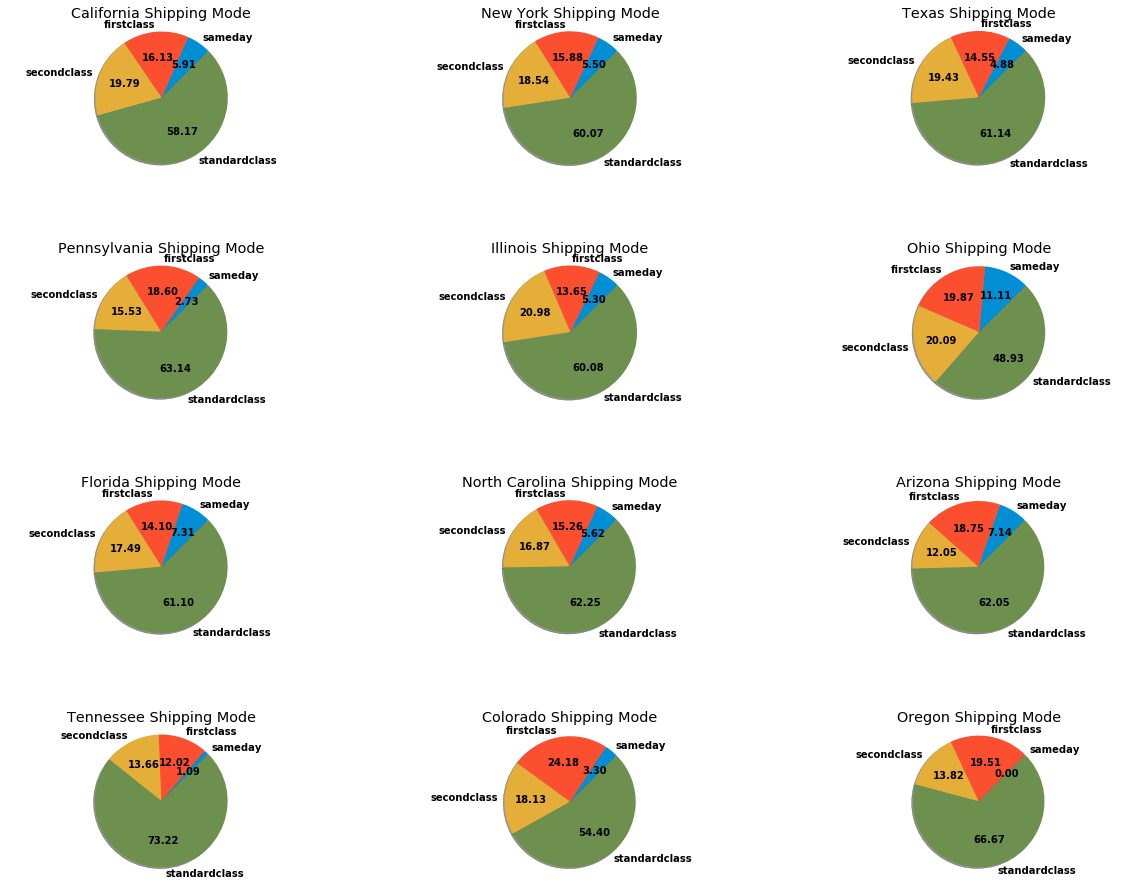

In [45]:
fig, axes = plt.subplots(4, 3, figsize=(18,14))
fig.tight_layout(pad=7.0)

axes[0,0].pie(state_shipmode[colname[0]].tolist(), labels = state_shipmode.index.tolist(), shadow = True, startangle = 45, autopct='%1.2f')
axes[0,0].axis('equal')
axes[0,0].set_title(str(colname[0]) + ' Shipping Mode')

axes[0,1].pie(state_shipmode[colname[1]].tolist(), labels = state_shipmode.index.tolist(), shadow = True, startangle = 45, autopct='%1.2f')
axes[0,1].axis('equal')
axes[0,1].set_title(str(colname[1]) + ' Shipping Mode')

axes[0,2].pie(state_shipmode[colname[2]].tolist(), labels = state_shipmode.index.tolist(), shadow = True, startangle = 45, autopct='%1.2f')
axes[0,2].axis('equal')
axes[0,2].set_title(str(colname[2]) + ' Shipping Mode')

axes[1,0].pie(state_shipmode[colname[3]].tolist(), labels = state_shipmode.index.tolist(), shadow = True, startangle = 45, autopct='%1.2f')
axes[1,0].axis('equal')
axes[1,0].set_title(str(colname[3]) + ' Shipping Mode')

axes[1,1].pie(state_shipmode[colname[4]].tolist(), labels = state_shipmode.index.tolist(), shadow = True, startangle = 45, autopct='%1.2f')
axes[1,1].axis('equal')
axes[1,1].set_title(str(colname[4]) + ' Shipping Mode')

axes[1,2].pie(state_shipmode[colname[5]].tolist(), labels = state_shipmode.index.tolist(), shadow = True, startangle = 45, autopct='%1.2f')
axes[1,2].axis('equal')
axes[1,2].set_title(str(colname[5]) + ' Shipping Mode')

axes[2,0].pie(state_shipmode[colname[6]].tolist(), labels = state_shipmode.index.tolist(), shadow = True, startangle = 45, autopct='%1.2f')
axes[2,0].axis('equal')
axes[2,0].set_title(str(colname[6]) + ' Shipping Mode')

axes[2,1].pie(state_shipmode[colname[7]].tolist(), labels = state_shipmode.index.tolist(), shadow = True, startangle = 45, autopct='%1.2f')
axes[2,1].axis('equal')
axes[2,1].set_title(str(colname[7]) + ' Shipping Mode')

axes[2,2].pie(state_shipmode[colname[8]].tolist(), labels = state_shipmode.index.tolist(), shadow = True, startangle = 45, autopct='%1.2f')
axes[2,2].axis('equal')
axes[2,2].set_title(str(colname[8]) + ' Shipping Mode')

axes[3,0].pie(state_shipmode[colname[9]].tolist(), labels = state_shipmode.index.tolist(), shadow = True, startangle = 45, autopct='%1.2f')
axes[3,0].axis('equal')
axes[3,0].set_title(str(colname[9]) + ' Shipping Mode')

axes[3,1].pie(state_shipmode[colname[10]].tolist(), labels = state_shipmode.index.tolist(), shadow = True, startangle = 45, autopct='%1.2f')
axes[3,1].axis('equal')
axes[3,1].set_title(str(colname[10]) + ' Shipping Mode')

axes[3,2].pie(state_shipmode[colname[11]].tolist(), labels = state_shipmode.index.tolist(), shadow = True, startangle = 45, autopct='%1.2f')
axes[3,2].axis('equal')
axes[3,2].set_title(str(colname[11]) + ' Shipping Mode')

In [51]:
state_shipmodepersalesamt = {}
for s in comparelist:
    df = compare_df.loc[compare_df['State'] == s]
    state = s
    standardsaleamount = 0
    secondsaleamount = 0
    firstsaleamount = 0
    samedaysaleamount = 0

    for i in range(len(df)):
        if df['Ship Mode'].iloc[i] == 'Standard Class':
            standardsaleamount += df['sale_totalamount'].iloc[i]	
        elif df['Ship Mode'].iloc[i] == 'Second Class':
            secondsaleamount += df['sale_totalamount'].iloc[i]
        elif df['Ship Mode'].iloc[i] == 'First Class':
            firstsaleamount += df['sale_totalamount'].iloc[i]
        else:
            samedaysaleamount += df['sale_totalamount'].iloc[i]


    state_shipmodepersalesamt[state] = {'sameday' : samedaysaleamount, 'firstclass' : firstsaleamount, 'secondclass' : secondsaleamount, 
                                      'standardclass' : standardsaleamount}


state_shipmodepersalesamt = pd.DataFrame.from_dict(state_shipmodepersalesamt)

In [52]:
state_shipmodepersalesamt

,California,New York,Texas,Pennsylvania,Illinois,Ohio,Florida,North Carolina,Arizona,Tennessee,Colorado,Oregon
sameday,137489.25,109859.35,27229.53,19732.17,9237.27,32403.66,21109.44,55752.84,9162.08,308.82,8695.65,0.00
firstclass,371201.69,300534.02,106800.27,89387.15,57634.39,64028.18,28334.11,23715.79,26728.87,23135.92,21357.66,9872.23
secondclass,460411.59,216880.38,183737.16,151448.30,80268.58,70470.65,110941.98,83213.44,17406.49,23341.83,14483.77,12247.57
standardclass,1331702.60,933603.41,516131.23,341512.86,217933.31,195068.72,311705.90,120095.61,116705.99,111868.46,101054.08,56868.52


Text(0.5, 108.49999999999989, 'ShippingMode_SalesAmount')

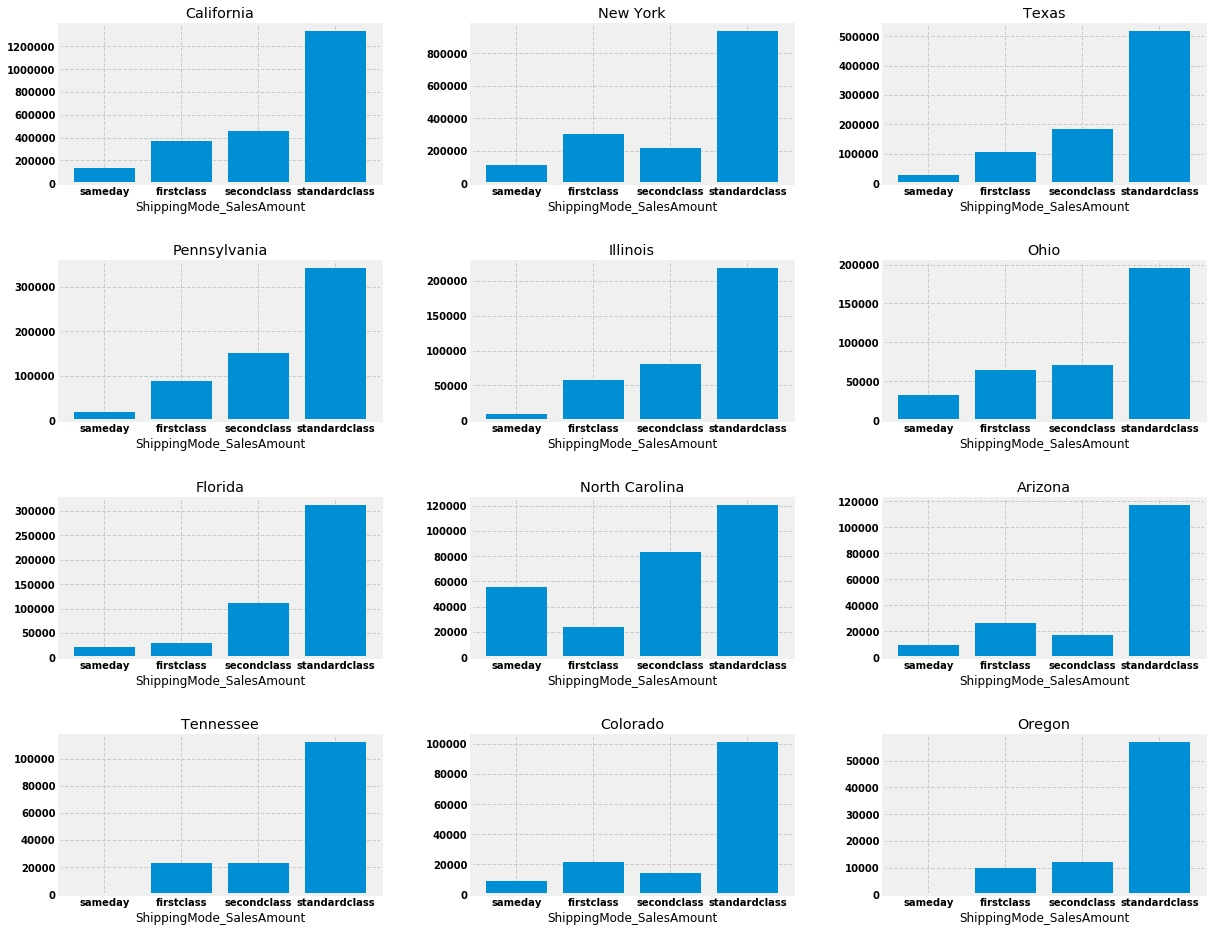

In [53]:
fig, axes = plt.subplots(4, 3, figsize=(18,14))
fig.tight_layout(pad=6.0)
axes[0,0].bar(state_shipmodepersalesamt.index.tolist(), state_shipmodepersalesamt[colname[0]].tolist())
axes[0,0].grid(True, linewidth= 1, linestyle="--")
axes[0,0].set_title(colname[0])
axes[0,0].set_xlabel('ShippingMode_SalesAmount')

axes[0,1].bar(state_shipmodepersalesamt.index.tolist(), state_shipmodepersalesamt[colname[1]].tolist())
axes[0,1].grid(True, linewidth= 1, linestyle="--")
axes[0,1].set_title(colname[1])
axes[0,1].set_xlabel('ShippingMode_SalesAmount')

axes[0,2].bar(state_shipmodepersalesamt.index.tolist(), state_shipmodepersalesamt[colname[2]].tolist())
axes[0,2].grid(True, linewidth= 1, linestyle="--")
axes[0,2].set_title(colname[2])
axes[0,2].set_xlabel('ShippingMode_SalesAmount')

axes[1,0].bar(state_shipmodepersalesamt.index.tolist(), state_shipmodepersalesamt[colname[3]].tolist())
axes[1,0].grid(True, linewidth= 1, linestyle="--")
axes[1,0].set_title(colname[3])
axes[1,0].set_xlabel('ShippingMode_SalesAmount')

axes[1,1].bar(state_shipmodepersalesamt.index.tolist(), state_shipmodepersalesamt[colname[4]].tolist())
axes[1,1].grid(True, linewidth= 1, linestyle="--")
axes[1,1].set_title(colname[4])
axes[1,1].set_xlabel('ShippingMode_SalesAmount')

axes[1,2].bar(state_shipmodepersalesamt.index.tolist(), state_shipmodepersalesamt[colname[5]].tolist())
axes[1,2].grid(True, linewidth= 1, linestyle="--")
axes[1,2].set_title(colname[5])
axes[1,2].set_xlabel('ShippingMode_SalesAmount')

axes[2,0].bar(state_shipmodepersalesamt.index.tolist(), state_shipmodepersalesamt[colname[6]].tolist())
axes[2,0].grid(True, linewidth= 1, linestyle="--")
axes[2,0].set_title(colname[6])
axes[2,0].set_xlabel('ShippingMode_SalesAmount')

axes[2,1].bar(state_shipmodepersalesamt.index.tolist(), state_shipmodepersalesamt[colname[7]].tolist())
axes[2,1].grid(True, linewidth= 1, linestyle="--")
axes[2,1].set_title(colname[7])
axes[2,1].set_xlabel('ShippingMode_SalesAmount')

axes[2,2].bar(state_shipmodepersalesamt.index.tolist(), state_shipmodepersalesamt[colname[8]].tolist())
axes[2,2].grid(True, linewidth= 1, linestyle="--")
axes[2,2].set_title(colname[8])
axes[2,2].set_xlabel('ShippingMode_SalesAmount')

axes[3,0].bar(state_shipmodepersalesamt.index.tolist(), state_shipmodepersalesamt[colname[9]].tolist())
axes[3,0].grid(True, linewidth= 1, linestyle="--")
axes[3,0].set_title(colname[9])
axes[3,0].set_xlabel('ShippingMode_SalesAmount')

axes[3,1].bar(state_shipmodepersalesamt.index.tolist(), state_shipmodepersalesamt[colname[10]].tolist())
axes[3,1].grid(True, linewidth= 1, linestyle="--")
axes[3,1].set_title(colname[10])
axes[3,1].set_xlabel('ShippingMode_SalesAmount')

axes[3,2].bar(state_shipmodepersalesamt.index.tolist(), state_shipmodepersalesamt[colname[11]].tolist())
axes[3,2].grid(True, linewidth= 1, linestyle="--")
axes[3,2].set_title(colname[11])
axes[3,2].set_xlabel('ShippingMode_SalesAmount')

### In the above bar subplots please note the values in y-axis are different in each subplots. 

### The comparison here in both the above subplots is related to the frequency of different shipping mode used for delivery of items to the customers by the states that are performing better and earning good profits with the states that are going in loss. That is the number of times the shipping mode is used for delivery of items to customers and also the sales amount that is the items values it has delivered in that shipping mode.

### In the above subplots we see that states California and New York (states which are performing better) have mostly used Standard Class as mode of shipping and in very less cases used other shipping modes like Second Class, First Class, Same Day compare to the amount of sales these states have done.

### Whereas the Texas, Ohio, Pennsylvania, Illinois, Florida, North Carolina, Arizona, Tennessee, Colorado and Oregon (states which are going in loss) have used Standard Class as mode of shipping and but have also used other shipping modes like Second Class, First Class, Same Day compare to the amount of sales these states have done.

### Though further deeper analyses are required to compare with category,	subcategory to know on which items which shipping mode is used. Here we are just comparing with the number of times the shipping mode is used and the total value of the items that was delivered in that shipping mode.

### Now mostly shipping charges are taken from customer, but in case if not then it’s a question and a serious matter for further analysis and discussion here. As maybe these shipping mode is also one of the reasons these states are going on loss. 

### If a good delivery is a marketing strategy to attract customers, it is time to revise their marketing strategy with an aim to make good profits with more sales. As a good delivery just to attract customers and going in loss is not a sensible business strategy. And there are other ways for a good customer-care strategy which can be applied during on-sales and after-sales for better customer retention and have them in the patron customers list and for word-of-mouth marketing.